<a href="https://colab.research.google.com/github/ewunder32/lab_hedonic_pricing/blob/main/lab_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in `pierce_county_house_sales.csv`, car prices in `cars_hw.csv`, and airbnb rental prices in `airbnb_hw.csv`.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an 80/20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Make partial correlation plots for each of the numeric variables in your model. Do you notice any significant non-linearities?
6. Include transformations and interactions of your variables, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
7. Summarize your results from 1 to 6. Have you learned anything about overfitting and underfitting, or model selection?
8. Use the `sklearn.linear_model.Lasso` to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**1.**

In [8]:
df = pd.read_csv("/content/pierce_county_house_sales.csv")

In [9]:
print("Shape:", df.shape)
print(df.info())
df.head()

Shape: (16814, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16814 entries, 0 to 16813
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   sale_date                    16814 non-null  object
 1   sale_price                   16814 non-null  int64 
 2   house_square_feet            16814 non-null  int64 
 3   attic_finished_square_feet   16814 non-null  int64 
 4   basement_square_feet         16814 non-null  int64 
 5   attached_garage_square_feet  16814 non-null  int64 
 6   detached_garage_square_feet  16814 non-null  int64 
 7   fireplaces                   16814 non-null  int64 
 8   hvac_description             16807 non-null  object
 9   exterior                     16813 non-null  object
 10  interior                     16807 non-null  object
 11  stories                      16814 non-null  int64 
 12  roof_cover                   16806 non-null  object
 13  year_built  

,sale_date,sale_price,house_square_feet,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet,fireplaces,hvac_description,exterior,interior,stories,roof_cover,year_built,bedrooms,bathrooms,waterfront_type,view_quality,utility_sewer
0,2020-01-02,380000,2157,0,0,528,0,0,Warm and Cool Air Zone,Frame Siding,Drywall,2,Composition Shingle,1993,3,3,NaN,NaN,SEWER/SEPTIC INSTALLED
1,2020-01-02,383000,2238,0,0,396,0,0,Forced Air,Frame Siding,Drywall,2,Composition Shingle,2017,4,3,NaN,NaN,SEWER/SEPTIC INSTALLED
2,2020-01-01,419900,1452,0,0,0,0,1,Forced Air,Frame Siding,Drywall,1,Built Up Rock,1965,3,2,NaN,NaN,SEWER/SEPTIC INSTALLED
3,2020-01-02,251660,832,0,0,0,0,0,Forced Air,Frame Vinyl,Drywall,1,Composition Shingle,1919,2,1,NaN,NaN,SEWER/SEPTIC INSTALLED
4,2020-01-02,500000,1780,0,384,484,0,1,Forced Air,Frame Siding,Drywall,1,Composition Shingle,1955,3,2,NaN,NaN,SEWER/SEPTIC INSTALLED


In [10]:
# Drop unecessary columns
df = df.drop(columns=['waterfront_type', 'view_quality'])
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna('Unknown')

In [11]:
print(df.info())
print(df.isnull().sum())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16814 entries, 0 to 16813
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   sale_date                    16814 non-null  object
 1   sale_price                   16814 non-null  int64 
 2   house_square_feet            16814 non-null  int64 
 3   attic_finished_square_feet   16814 non-null  int64 
 4   basement_square_feet         16814 non-null  int64 
 5   attached_garage_square_feet  16814 non-null  int64 
 6   detached_garage_square_feet  16814 non-null  int64 
 7   fireplaces                   16814 non-null  int64 
 8   hvac_description             16814 non-null  object
 9   exterior                     16814 non-null  object
 10  interior                     16814 non-null  object
 11  stories                      16814 non-null  int64 
 12  roof_cover                   16814 non-null  object
 13  year_built                   16

,sale_date,sale_price,house_square_feet,attic_finished_square_feet,basement_square_feet,attached_garage_square_feet,detached_garage_square_feet,fireplaces,hvac_description,exterior,interior,stories,roof_cover,year_built,bedrooms,bathrooms,utility_sewer
0,2020-01-02,380000,2157,0,0,528,0,0,Warm and Cool Air Zone,Frame Siding,Drywall,2,Composition Shingle,1993,3,3,SEWER/SEPTIC INSTALLED
1,2020-01-02,383000,2238,0,0,396,0,0,Forced Air,Frame Siding,Drywall,2,Composition Shingle,2017,4,3,SEWER/SEPTIC INSTALLED
2,2020-01-01,419900,1452,0,0,0,0,1,Forced Air,Frame Siding,Drywall,1,Built Up Rock,1965,3,2,SEWER/SEPTIC INSTALLED
3,2020-01-02,251660,832,0,0,0,0,0,Forced Air,Frame Vinyl,Drywall,1,Composition Shingle,1919,2,1,SEWER/SEPTIC INSTALLED
4,2020-01-02,500000,1780,0,384,484,0,1,Forced Air,Frame Siding,Drywall,1,Composition Shingle,1955,3,2,SEWER/SEPTIC INSTALLED


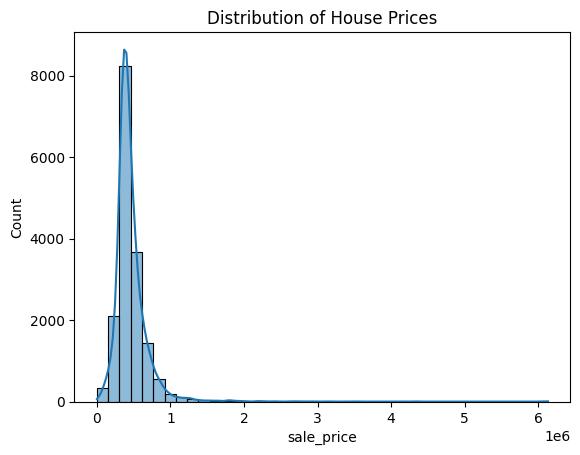

In [12]:
# Distribution of price
sns.histplot(df['sale_price'], bins=40, kde=True)
plt.title("Distribution of House Prices")
plt.show()

In [13]:
cat_cols = df.select_dtypes(exclude=[np.number]).columns
for col in cat_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts().head())


Value counts for sale_date:
sale_date
2020-07-28    109
2020-10-28    105
2020-09-23    104
2020-08-12    102
2020-07-23    102
Name: count, dtype: int64

Value counts for hvac_description:
hvac_description
Forced Air                10382
Electric Baseboard         2668
Heat Pump                  2084
Warm and Cool Air Zone     1268
Floor/Wall Furnace          174
Name: count, dtype: int64

Value counts for exterior:
exterior
Frame Siding              14577
Frame Vinyl                1724
Masonry Common Brick        208
Frame Stucco                156
Masonry Concrete Block       43
Name: count, dtype: int64

Value counts for interior:
interior
Drywall     16777
Paneling       30
Unknown         7
Name: count, dtype: int64

Value counts for roof_cover:
roof_cover
Composition Shingle    15775
Concrete Tile            308
Built Up Rock            236
Formed Seam Metal        232
Wood Shake               197
Name: count, dtype: int64

Value counts for utility_sewer:
utility_sewer
SEWER/S

**2.**

In [14]:
cat_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

**3.**

In [15]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('sale_price', axis=1)
y = df_encoded['sale_price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (13451, 408)
Test set shape: (3363, 408)


**4.**

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Relationship with Square Footage
X1_train = X_train[['house_square_feet']]
X1_test = X_test[['house_square_feet']]

model1 = LinearRegression()
model1.fit(X1_train, y_train)

# Predictions
y_pred_train1 = model1.predict(X1_train)
y_pred_test1 = model1.predict(X1_test)

# Evaluate
rmse_train1 = np.sqrt(mean_squared_error(y_train, y_pred_train1))
rmse_test1 = np.sqrt(mean_squared_error(y_test, y_pred_test1))
r2_train1 = r2_score(y_train, y_pred_train1)
r2_test1 = r2_score(y_test, y_pred_test1)

print("Model 1: house_square_feet")
print(f"Train RMSE: {rmse_train1:.2f}, Test RMSE: {rmse_test1:.2f}")
print(f"Train R²: {r2_train1:.4f}, Test R²: {r2_test1:.4f}\n")

Model 1: house_square_feet
Train RMSE: 195447.67, Test RMSE: 220635.05
Train R²: 0.2814, Test R²: 0.2625



In [17]:
# House square feet and added bedroms and bathrooms
features2 = ['house_square_feet', 'bedrooms', 'bathrooms']
X2_train = X_train[features2]
X2_test = X_test[features2]

model2 = LinearRegression()
model2.fit(X2_train, y_train)

y_pred_train2 = model2.predict(X2_train)
y_pred_test2 = model2.predict(X2_test)

rmse_train2 = np.sqrt(mean_squared_error(y_train, y_pred_train2))
rmse_test2 = np.sqrt(mean_squared_error(y_test, y_pred_test2))
r2_train2 = r2_score(y_train, y_pred_train2)
r2_test2 = r2_score(y_test, y_pred_test2)

print("Model 2: house size + beds + baths")
print(f"Train RMSE: {rmse_train2:.2f}, Test RMSE: {rmse_test2:.2f}")
print(f"Train R²: {r2_train2:.4f}, Test R²: {r2_test2:.4f}\n")

Model 2: house size + beds + baths
Train RMSE: 192695.34, Test RMSE: 217501.78
Train R²: 0.3015, Test R²: 0.2833



In [18]:
# Model 2 and added year built
features3 = ['house_square_feet', 'bedrooms', 'bathrooms', 'year_built']
X3_train = X_train[features3]
X3_test = X_test[features3]

model3 = LinearRegression()
model3.fit(X3_train, y_train)

y_pred_train3 = model3.predict(X3_train)
y_pred_test3 = model3.predict(X3_test)

rmse_train3 = np.sqrt(mean_squared_error(y_train, y_pred_train3))
rmse_test3 = np.sqrt(mean_squared_error(y_test, y_pred_test3))
r2_train3 = r2_score(y_train, y_pred_train3)
r2_test3 = r2_score(y_test, y_pred_test3)

print("Model 3: house size + beds + baths + year built")
print(f"Train RMSE: {rmse_train3:.2f}, Test RMSE: {rmse_test3:.2f}")
print(f"Train R²: {r2_train3:.4f}, Test R²: {r2_test3:.4f}\n")

Model 3: house size + beds + baths + year built
Train RMSE: 191453.19, Test RMSE: 216905.66
Train R²: 0.3105, Test R²: 0.2872



In [19]:
# Full feature model
model4 = LinearRegression()
model4.fit(X_train, y_train)

y_pred_train4 = model4.predict(X_train)
y_pred_test4 = model4.predict(X_test)

rmse_train4 = np.sqrt(mean_squared_error(y_train, y_pred_train4))
rmse_test4 = np.sqrt(mean_squared_error(y_test, y_pred_test4))
r2_train4 = r2_score(y_train, y_pred_train4)
r2_test4 = r2_score(y_test, y_pred_test4)

print("Model 4: All features")
print(f"Train RMSE: {rmse_train4:.2f}, Test RMSE: {rmse_test4:.2f}")
print(f"Train R²: {r2_train4:.4f}, Test R²: {r2_test4:.4f}\n")

Model 4: All features
Train RMSE: 169076.14, Test RMSE: 199832.12
Train R²: 0.4623, Test R²: 0.3950



In [20]:
results = pd.DataFrame({
    "Model": ["1 (Sq ft)", "2 (Sq ft + Beds/Baths)", "3 (Sq ft + Beds/Baths + Year Built)", "4 (Full Feature)"],
    "Train RMSE": [rmse_train1, rmse_train2, rmse_train3, rmse_train4],
    "Test RMSE": [rmse_test1, rmse_test2, rmse_test3, rmse_test4],
    "Train R²": [r2_train1, r2_train2, r2_train3, r2_train4],
    "Test R²": [r2_test1, r2_test2, r2_test3, r2_test4]
})

print(results)

                                 Model     Train RMSE      Test RMSE  \
0                            1 (Sq ft)  195447.665607  220635.049088   
1               2 (Sq ft + Beds/Baths)  192695.342053  217501.776499   
2  3 (Sq ft + Beds/Baths + Year Built)  191453.193778  216905.658580   
3                     4 (Full Feature)  169076.143021  199832.115756   

   Train R²   Test R²  
0  0.281443  0.262474  
1  0.301538  0.283273  
2  0.310514  0.287196  
3  0.462269  0.394995  


The full feature model performs the best among the simple linear models, achieving the lowest RMSE and highest $R^2$ on both the training and test sets. This suggests that including additional structural and categorical property features iproves predictive power.

**5.**

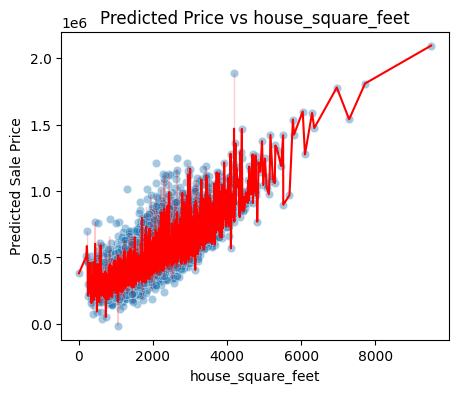

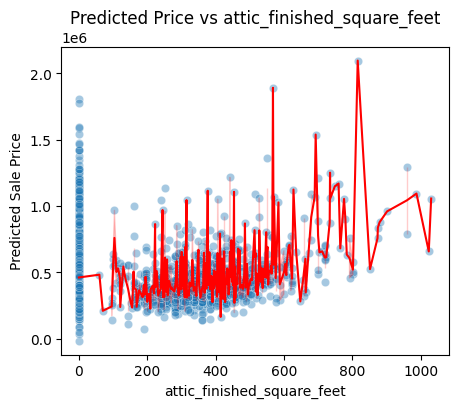

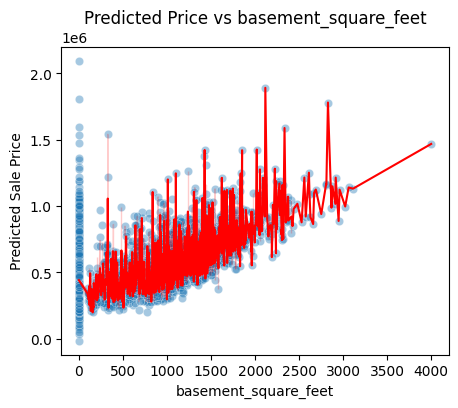

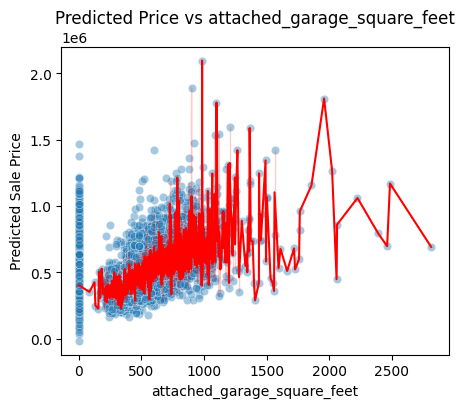

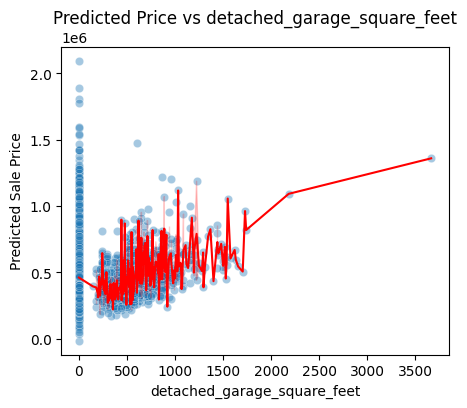

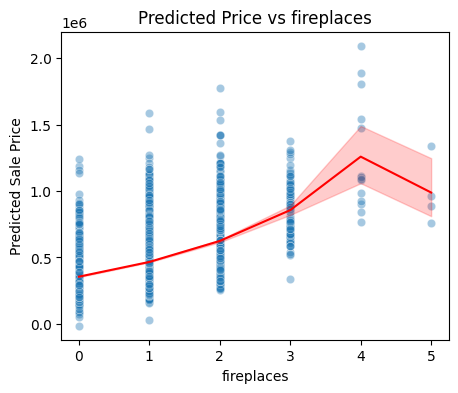

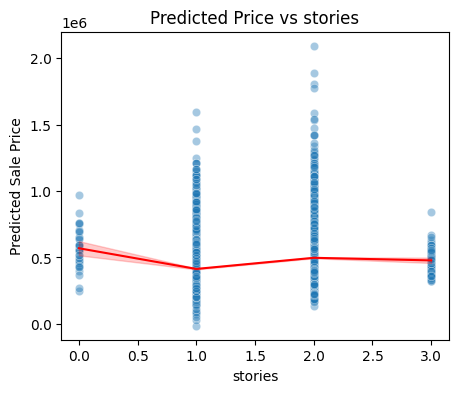

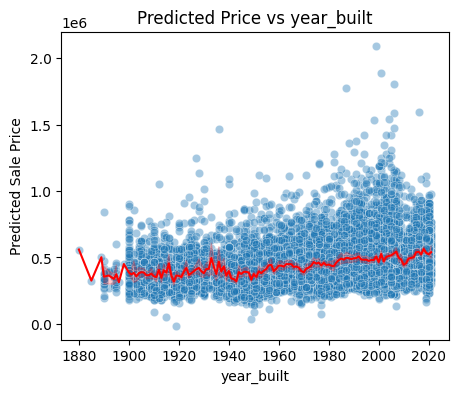

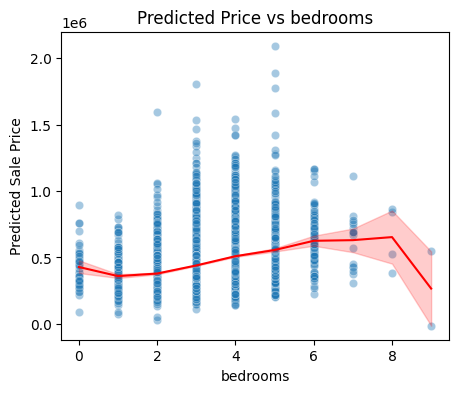

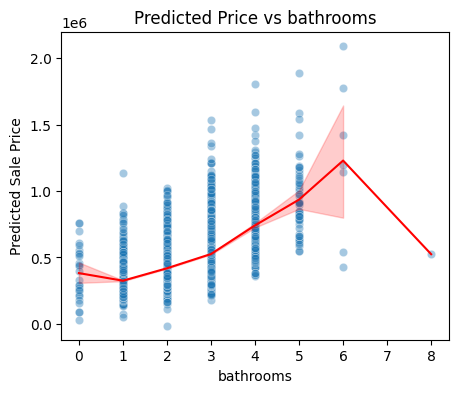

In [21]:
# Compute plots of best model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_train)

# Pick numeric columns
numeric_cols = [
    'house_square_feet', 'attic_finished_square_feet', 'basement_square_feet',
    'attached_garage_square_feet', 'detached_garage_square_feet',
    'fireplaces', 'stories', 'year_built', 'bedrooms', 'bathrooms'
]

# Plot scatter plots for each variable
for col in numeric_cols:
    plt.figure(figsize=(5,4))
    sns.scatterplot(x=X_train[col], y=model.predict(X_train), alpha=0.4)
    sns.lineplot(x=X_train[col], y=model.predict(X_train), color='red')
    plt.title(f"Predicted Price vs {col}")
    plt.xlabel(col)
    plt.ylabel("Predicted Sale Price")
    plt.show()

Based on the above plots, the most significant non-linearity appears in the relationship between house_square_feet and predicted sale price, where the price increases at a decreasing rate as the square footage increases. The other numeric variables show a more linear relationship with predicted sale price, although there is considerable scatter. The year_built variable shows a slight non-linear trend, suggesting that newer homes might have a slightly stronger positive impact on price.

**6.**

In [22]:
# Include transformations and interactions
X_train_complex = X_train.copy()
X_test_complex = X_test.copy()

# Address the non-linearity in 'house_square_feet' with a log transformation
X_train_complex['house_square_feet_log'] = np.log1p(X_train_complex['house_square_feet'])
X_test_complex['house_square_feet_log'] = np.log1p(X_test_complex['house_square_feet'])

# Interaction between house size and year built
X_train_complex['house_year_interaction'] = X_train_complex['house_square_feet'] * X_train_complex['year_built']
X_test_complex['house_year_interaction'] = X_test_complex['house_square_feet'] * X_test_complex['year_built']

# You can add more transformations and interactions here based on your EDA and domain knowledge.
# For example:
# X_train_complex['bedrooms_bathrooms_interaction'] = X_train_complex['bedrooms'] * X_train_complex['bathrooms']
# X_test_complex['bedrooms_bathrooms_interaction'] = X_test_complex['bedrooms'] * X_test_complex['bathrooms']

# Drop the original 'house_square_feet' column after transformation
X_train_complex = X_train_complex.drop('house_square_feet', axis=1)
X_test_complex = X_test_complex.drop('house_square_feet', axis=1)

In [23]:
# Train the complex model
model_complex = LinearRegression()
model_complex.fit(X_train_complex, y_train)

# Predictions
y_pred_train_complex = model_complex.predict(X_train_complex)
y_pred_test_complex = model_complex.predict(X_test_complex)

# Evaluate
rmse_train_complex = np.sqrt(mean_squared_error(y_train, y_pred_train_complex))
rmse_test_complex = np.sqrt(mean_squared_error(y_test, y_pred_test_complex))
r2_train_complex = r2_score(y_train, y_pred_train_complex)
r2_test_complex = r2_score(y_test, y_pred_test_complex)

print("Complex Model:")
print(f"Train RMSE: {rmse_train_complex:.2f}, Test RMSE: {rmse_test_complex:.2f}")
print(f"Train R²: {r2_train_complex:.4f}, Test R²: {r2_test_complex:.4f}\n")

Complex Model:
Train RMSE: 168290.51, Test RMSE: 198986.83
Train R²: 0.4673, Test R²: 0.4001



The complex model incorporating transformations and interactions aims to capture more nuanced relationships in the data. Comparing its performance metrics (RMSE and R²) on both the training and test sets to the simpler models will help us determine whether these additions improve the model's predictive power. A significantly lower RMSE and higher R² on the test set for the complex model would indicate a better fit to unseen data.

**7.**

We have found that including more relevant features and addressing non-linearities can improve predictive performance, as evidenced by the lower RMSE and higher R² values on the test set for the complex model compared to simpler ones. The simpler models likely faced underfitting, failing to capture the data's complexity. While the complex model performed better, the comparison between its training and test set performance highlights the importance of monitoring for overfitting, where a model fits the training data too closely and generalizes poorly to new data.

**8.**

In [27]:
from sklearn.linear_model import Lasso

# Initialize Lasso model (you might need to tune the alpha parameter)
lasso_model = Lasso(alpha=0.1, random_state=42, max_iter=10000)

# Fit the model on the training data
lasso_model.fit(X_train_complex, y_train)

# Identify selected features (coefficients that are not zero)
selected_features = X_train_complex.columns[lasso_model.coef_ != 0]

print("Selected Features by Lasso:")
print(selected_features)

# Predictions
y_pred_train_lasso = lasso_model.predict(X_train_complex)
y_pred_test_lasso = lasso_model.predict(X_test_complex)

# Evaluate
rmse_train_lasso = np.sqrt(mean_squared_error(y_train, y_pred_train_lasso))
rmse_test_lasso = np.sqrt(mean_squared_error(y_test, y_pred_test_lasso))
r2_train_lasso = r2_score(y_train, y_pred_train_lasso)
r2_test_lasso = r2_score(y_test, y_pred_test_lasso)

print("\nLasso Model Performance:")
print(f"Train RMSE: {rmse_train_lasso:.2f}, Test RMSE: {rmse_test_lasso:.2f}")
print(f"Train R²: {r2_train_lasso:.4f}, Test R²: {r2_test_lasso:.4f}\n")

Selected Features by Lasso:
Index(['attic_finished_square_feet', 'basement_square_feet',
       'attached_garage_square_feet', 'detached_garage_square_feet',
       'fireplaces', 'stories', 'year_built', 'bedrooms', 'bathrooms',
       'sale_date_2020-01-02',
       ...
       'roof_cover_Formed Seam Metal', 'roof_cover_Preformed Metal',
       'roof_cover_Unknown', 'roof_cover_Wood Shake',
       'utility_sewer_SEWER/SEPTIC AVAIL',
       'utility_sewer_SEWER/SEPTIC INSTALLED', 'utility_sewer_SEWER/SEPTIC NO',
       'utility_sewer_SEWER/SEPTIC NO PERC', 'house_square_feet_log',
       'house_year_interaction'],
      dtype='object', length=406)

Lasso Model Performance:
Train RMSE: 168291.31, Test RMSE: 198888.44
Train R²: 0.4672, Test R²: 0.4007



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.282e+14, tolerance: 7.151e+10
  model = cd_fast.enet_coordinate_descent(


When using Lasso regularization, the model selected the features listed above as the most predictive for house sale price. The RMSE and R² values indicate the model's performance after applying Lasso.